# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [8]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.



***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [7]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [11]:
boston.data.shape

(506, 13)

In [12]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
boston.target.shape

(506,)

In [14]:
boston.data.shape

(506, 13)

Now let's explore the data set itself. 

In [15]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [18]:
print(boston.target.shape)

(506,)


In [19]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [20]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

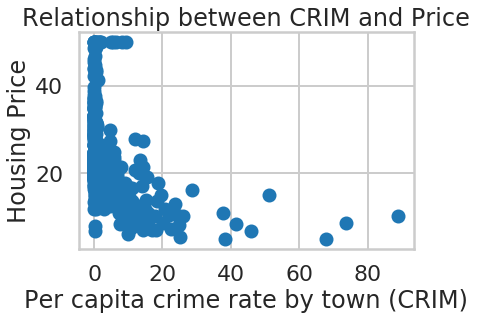

In [22]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Number of rooms and pupil-to-teacher ratio in schools are all correlated with house price. Pupil-to-teacher ratio is negatively correlated while number of rooms is positively correlated. This is all as expected, wealthier areas (with more expensive homes) should have more resources to hire teachers for schools lowering this ratio. Wealthier areas will also have larger homes and therefore on average more rooms. The person correlation number of rooms is 0.70 which indicate a high goodness of fit.

In [25]:
# your turn: describe relationship
from sklearn.preprocessing import scale
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def corr(x_str, y_str, dataframe):
    #linear regression
    line = LinearRegression()
    line.fit(dataframe[[x_str]],dataframe[y_str])
    slope=float(line.coef_)
    y_intercept = float(line.intercept_)
    x_line=np.linspace(-100,1000,10)
    y_line=slope*x_line+y_intercept
    y_predict=slope*np.array(dataframe[x_str])+y_intercept
    plt.plot(x_line,y_line)
    plt.scatter(data=dataframe,x=x_str,y=y_str)
    coef,pvalue = pearsonr(dataframe[x_str], dataframe[y_str])  
    rmse = np.sqrt(mean_squared_error(y_predict,dataframe[y_str]))
    print('{}, {}'.format(x_str,y_str))
    print('    pearson r = {:.2f}'.format(coef))
    print('    p-value = {:.2e}'.format(pvalue))
    print('    RMSE = {:.2f}'.format(rmse))

RM, PRICE
    pearson r = 0.70
    p-value = 2.49e-74
    RMSE = 6.60


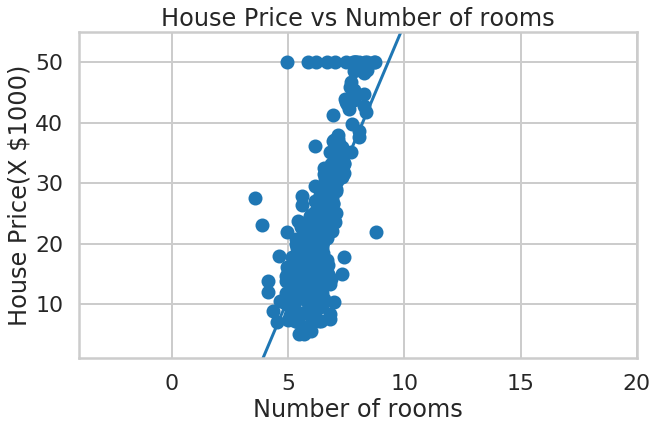

In [26]:
plt.figure(figsize=(10,6))
corr('RM','PRICE',bos)
plt.ylabel('House Price(X $1000)')
plt.xlabel('Number of rooms')
plt.title('House Price vs Number of rooms')
plt.xlim(-4,20)
plt.ylim(1,55)
plt.show()

PTRATIO, PRICE
    pearson r = -0.51
    p-value = 1.61e-34
    RMSE = 7.92


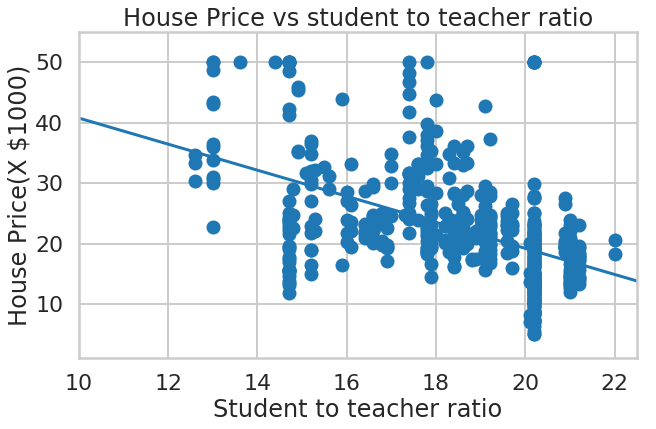

In [24]:
plt.figure(figsize=(10,6))
corr('PTRATIO','PRICE',bos)
plt.ylabel('House Price(X $1000)')
plt.xlabel('Student to teacher ratio')
plt.title('House Price vs student to teacher ratio')
plt.xlim(10,22.5)
plt.ylim(1,55)
plt.show()

Every attribute is correlated examined are all correlated with housing price. As nitric oxide is a pollutant, it is not surprising that it would be negatively correlated with housing price. Lower concentration of pollution may make an area more desirable. Since older house may be decrepitated, older house may be cheap which may explain the negative correlation of portion of home built before 1940 and house price. Final percentage of lower status of the population measures wealth which should be correlated with house price since wealthier people buy more expensive houses. 

AGE, PRICE
    pearson r = -0.38
    p-value = 1.57e-18
    RMSE = 8.51


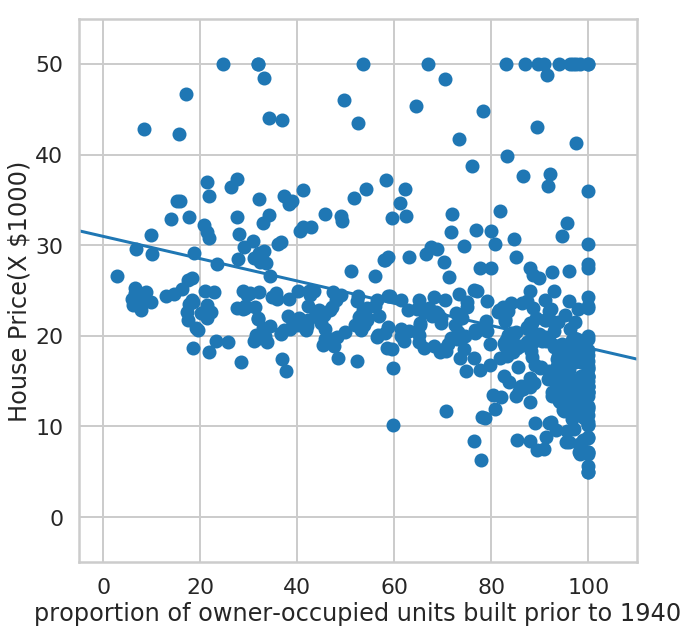

In [28]:
#proportion of owner-occupied units built prior to 1940 and price
fig = plt.figure(figsize=(10,10))
corr('AGE','PRICE',bos)

plt.xlabel('proportion of owner-occupied units built prior to 1940')
plt.ylabel('House Price(X $1000)')
plt.xlim(-5,110)
plt.ylim(-5,55)
plt.show()

NOX, PRICE
    pearson r = -0.43
    p-value = 7.07e-24
    RMSE = 8.31


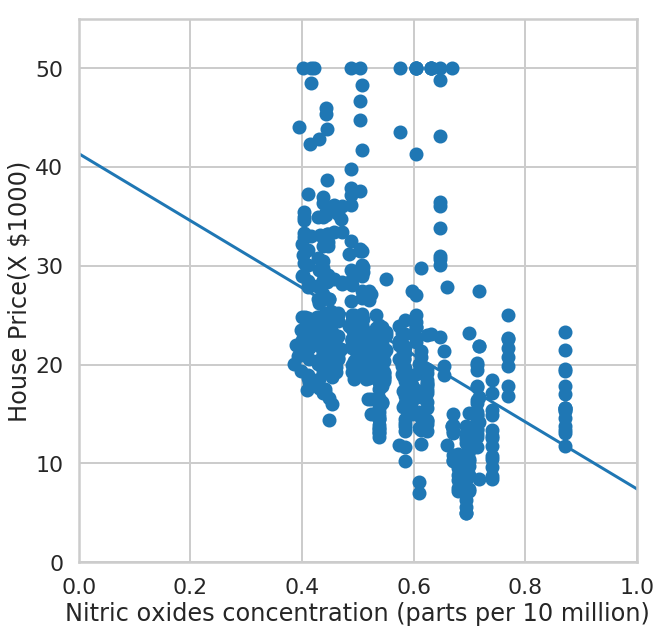

In [21]:
#Tax and price
fig = plt.figure(figsize=(10,10))
corr('NOX','PRICE',bos)
#plt.scatter('NOX','PRICE',data=bos)
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('House Price(X $1000)')
plt.xlim(0,1)
plt.ylim(0,55)
plt.show()

LSTAT, PRICE
    pearson r = -0.74
    p-value = 5.08e-88
    RMSE = 6.20


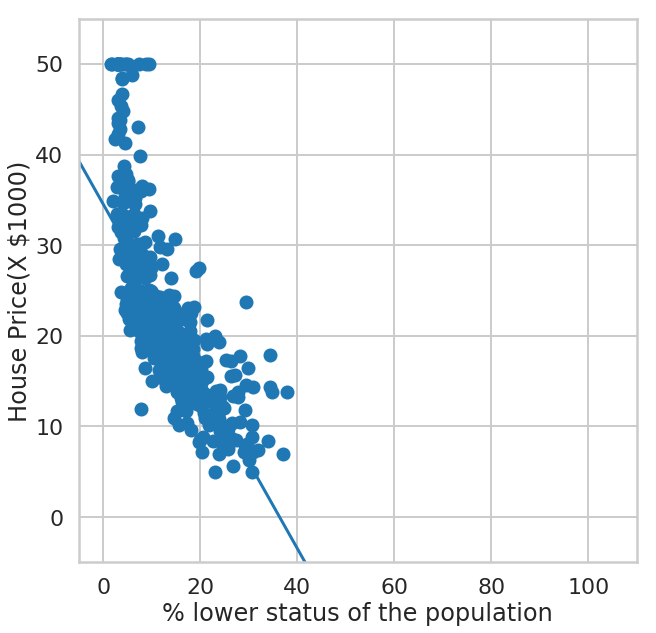

In [20]:
#Zone and price
fig = plt.figure(figsize=(10,10))
corr('LSTAT','PRICE',bos)

plt.xlabel('% lower status of the population')
plt.ylabel('House Price(X $1000)')
plt.xlim(-5,110)
plt.ylim(-5,55)
plt.show()

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

/home/yoni/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


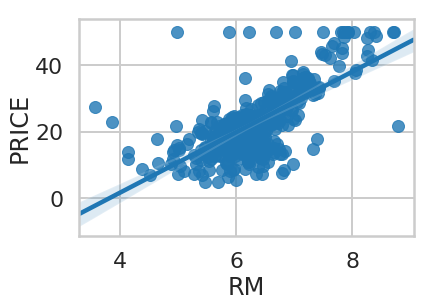

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.show()

### Histograms
***


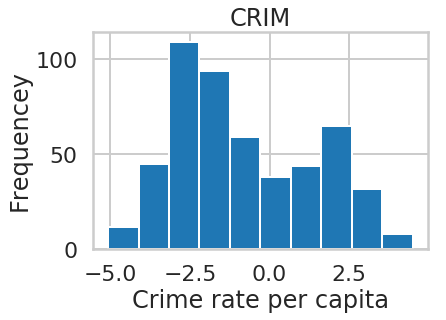

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

Logarithmic scales are used to compare values which differ by orders of magnitude (such as pH or the over scale). The majority of Boston suburbs crime per capita is between 0 and 1. Because of this, there is a scaling issue that the lowest crime per capita bin is overshadowing the rest. Once the values of this attribute are switched to a logarithmic scale, the data points are more spread separating them into more bins. The crime per capita of suburbs frequencies examine frequency of magnitude rather than value. This would be difficult to visualize in a linear scale.

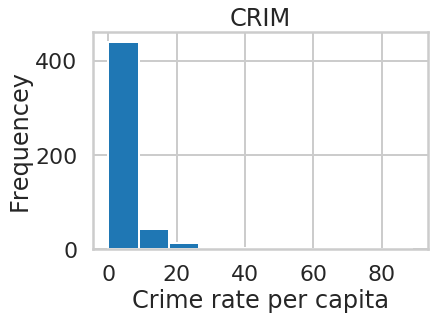

In [25]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

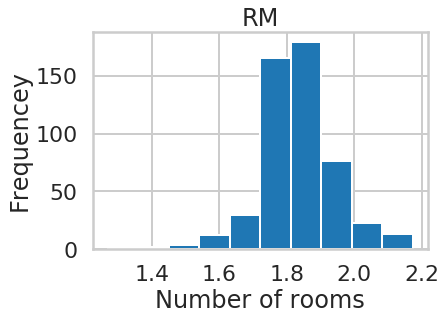

In [26]:
plt.hist(np.log(bos.RM))
plt.title("RM")
plt.xlabel("Number of rooms")
plt.ylabel("Frequencey")
plt.show()

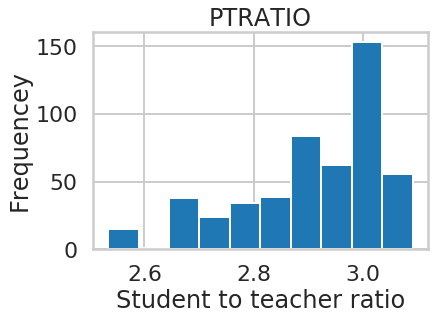

In [27]:
plt.hist(np.log(bos.PTRATIO))
plt.title("PTRATIO")
plt.xlabel("Student to teacher ratio")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        17:06:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0


There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

The predicted fitted shows the overall trend of the scatter plot. There is a wide spread loose fitting with an overall trend upwards. This is typical behavior between correlated variables in which the dependent variable has multitude contributing factors.

/home/yoni/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


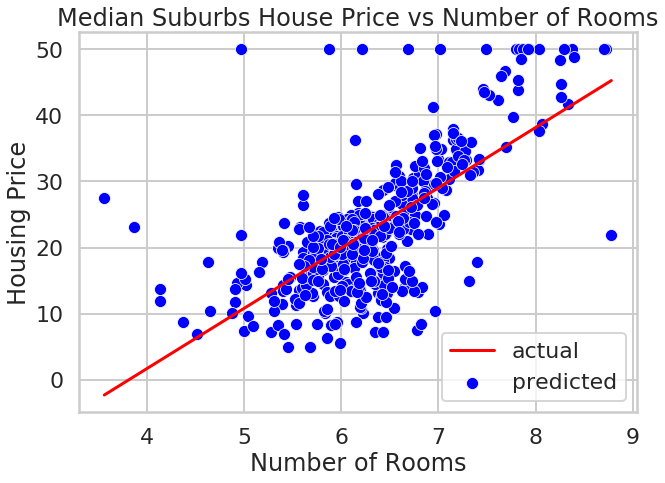

In [30]:
fig = plt.figure(figsize=(10,7))
sns.scatterplot(x=bos['RM'],y=bos['PRICE'],color='blue')
sns.lineplot(x=bos['RM'],y=m.fittedvalues,color='red')
plt.xlabel('Number of Rooms')
plt.ylabel('Housing Price')
plt.legend(['actual','predicted'])
plt.title('Median Suburbs House Price vs Number of Rooms')
plt.show()

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [242]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [32]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


Without fitting the intercept to zero, the coefficient of determination (R^2) is slightly larger, indicating a better fit. If the theory behind the model suggests that the dependent variable is zero or approaches zero when the independent variables also are, you may want to fit intercept to zero. For the Boston housing data, because the fit is better and the fact that without fitting the intercept to zero it is large (about 36) are good reasons not to fit the intercept to zero. 
  
The residues (difference between predicted value and actual) is expected to have an normal distribution around the regression line. As well as normally distributed, the residues in the same should be independent. This is to say that the findings of data point should not affect future ones. 
  
False, the regression model assumes that the residue must be normally distributed, not Y. 

In [33]:
#intercept not fit through zero
print('intercept not through zero')
print(' R^2={:.2f}'.format(lm.score(X,bos.PRICE)))
print('c ={}'.format(lm.coef_))
print('y-intercept = {}'.format(lm.intercept_))
  
#intercept through zero
lm2=LinearRegression(fit_intercept=False)
lm2.fit(X, bos.PRICE)
print('\nintercept through zero')
print(' R^2={:.2f}'.format(lm2.score(X,bos.PRICE)))
print('c ={}'.format(lm2.coef_))
print('y-intercept = {}'.format(lm2.intercept_))

intercept not through zero
 R^2=0.74
c =[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
y-intercept = 36.491103280361344

intercept through zero
 R^2=0.71
c =[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
 -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
  1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
 -4.16972624e-01]
y-intercept = 0.0


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$

In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280361344


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

The price of houses in the Boston area makes a mostly normal distribution centered at approximately 20 thousand dollars. The distribution ranges from approximately 0 to 40 thousand dollars. The actual prices (rather than the predict) that the predict model was used to create also has none unsubstantial number of house priced at 50 thousand dollars. This may be what skews the data rightwards With more datapoint (or resampling), we maybe about to improve the overlap of the predict and actual histagram.

The predicted prices is in good agreement with the actual prices. A scatter plot of the predict vs actual prices is closely scattered close to the line y=x which it would be completely aligned if there was perfect agreement.

`statsmodels` vs `scikit-learn`

The scikit-learn model is an easy to use module for predictions for machine learning methods such as regressions, clustering, and classification. The module statsmodels was designed for statistics and as such it will display statistical information such as R^2, F-value, and p-values are more readily available. Statsmodels was also designed for those familiar with R.

/home/yoni/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


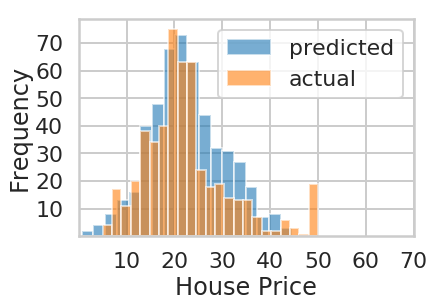

Predicted mean = 22.53
Predicted std = 7.91
Predicted median = 22.12

actual mean = 22.53
actual std = 9.20
actual median = 21.20


In [38]:
#histagram
predicted_price = lm.predict(X)
sns.distplot(predicted_price,kde=False, hist_kws={'alpha':0.6})
sns.distplot(bos['PRICE'],kde=False, hist_kws={'alpha':0.6})
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.legend(['predicted','actual'])
plt.xlim(0,70)
plt.yticks([10,20,30,40,50,60,70])
plt.xticks([10,20,30,40,50,60,70])
plt.show()
print('Predicted mean = {:.2f}'.format(np.mean(predicted_price)))
print('Predicted std = {:.2f}'.format(np.std(predicted_price)))
print('Predicted median = {:.2f}'.format(np.median(predicted_price)))
print('\nactual mean = {:.2f}'.format(bos['PRICE'].mean()))
print('actual std = {:.2f}'.format(bos['PRICE'].std()))
print('actual median = {:.2f}'.format(bos['PRICE'].median()))

[]

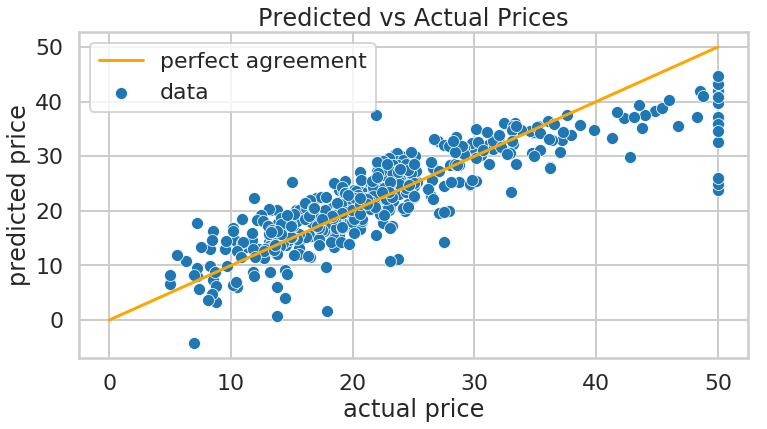

In [39]:
#scatterplot
plt.figure(figsize=(12,6))
X_line=np.linspace(0,50,51)
sns.scatterplot(x=bos['PRICE'],y=predicted_price)
sns.lineplot(X_line,X_line,color='orange')
plt.title('Predicted vs Actual Prices')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.legend(['perfect agreement','data'])
plt.plot()

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [40]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149875


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [41]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.338093633899414e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

The coefficient of the determination (R^2) for the linear regression between house price and student to teacher ratio is 0.258. This value indicates how well the regression line fits the data with a 1 being a perfect fit.
 
The F-value is a metric in comparious method to see how much of the variation can be explained by differences between groups rather than variations within a group. For linear regressions, this becomes a metric on how much does independent variable is affected by dependent variable rather than the residue. The F-value for the between house price and student to teacher ratio is 175. This is indicates a extremely small p-value and that the correlation between house price and student to teacher ratio is significant.
 
The F-value is the square of the t-value for the regression coefficient.

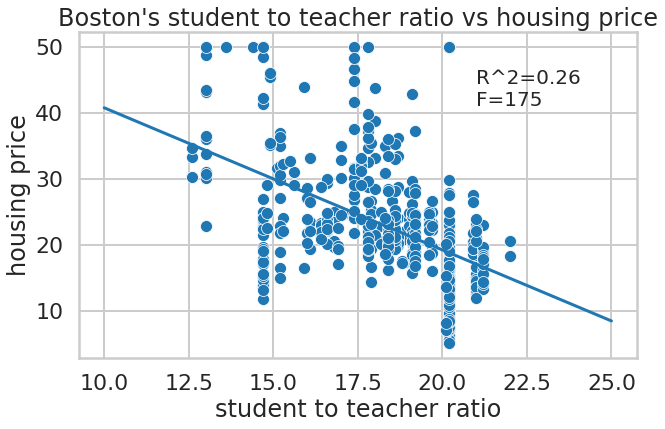

                            OLS Regression Results                            
Dep. Variable:                PTRATIO   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           1.61e-34
Time:                        17:07:35   Log-Likelihood:                -1032.9
No. Observations:                 506   AIC:                             2070.
Df Residuals:                     504   BIC:                             2078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1489      0.220     96.216      0.0

In [42]:
ln_ptratio = LinearRegression()
ln_ptratio.fit(bos[['PTRATIO']],bos['PRICE'])
x_line = np.linspace(10,25,20).reshape(-1, 1)
y_line = ln_ptratio.predict(x_line)
x_line = x_line.ravel()
plt.figure(figsize=(10,6))
sns.scatterplot(x=bos['PTRATIO'],y=bos['PRICE'])
sns.lineplot(x=x_line,y=y_line)
plt.xlabel('student to teacher ratio')
plt.ylabel('housing price')
plt.title('Boston\'s student to teacher ratio vs housing price')
#Rsquared
Rsquare = ln_ptratio.score(bos[['PTRATIO']],bos['PRICE'])

#f-test
row,col=bos.drop(labels='PRICE',axis=1).shape
N=row*col
K=col
Fvalue= Rsquare/(1-Rsquare)*(N-K-1)/K
text='R^2='+str(Rsquare.round(2))+'\nF='+str(int(Fvalue//1)) 
plt.text(x=21,y=41,s=text,fontsize=20)
plt.show()

m = ols('PTRATIO ~ PRICE',bos).fit()
print(m.summary())

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

The $F$-statistic is a metric of what portion of the variation in the dependent variables is due to the variation in the independent variables rather than the variation is the residues. 

The $R^2$ statistic shows how close the independent and dependent variables are correlated.

In Boston, it was found that per capita crime rate, the number of rooms and pupil-teacher ratio all correlated with house price. These correlations were all statistically significant. Of these three predictors, the number of rooms was the strongest. The number of rooms had the greatest correlation (R$^2$=0.48) and the highest F-value(F=472). This makes sense,  wealth of population is only one of the factors that contribute to the pupil-teacher ratio and per capita crime rate and it is likely that this link between these two attributes to house price. The number of rooms more directly contributes to the house price since bigger house will cost more and have more rooms. 

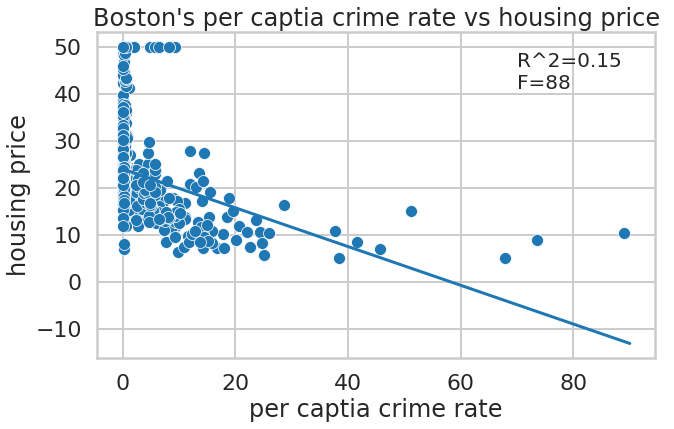

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.08e-19
Time:                        17:07:39   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3535.
Df Residuals:                     504   BIC:                             3543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7202      0.935     12.539      0.0

In [43]:
# per capita crime  by town vs price
ln_crime = LinearRegression()
ln_crime.fit(bos[['CRIM']],bos['PRICE'])
x_line = np.linspace(0,90,91).reshape(-1, 1)
y_line = ln_crime.predict(x_line)
x_line = x_line.ravel()
plt.figure(figsize=(10,6))
sns.scatterplot(x=bos['CRIM'],y=bos['PRICE'])
sns.lineplot(x=x_line,y=y_line)
plt.xlabel('per captia crime rate')
plt.ylabel('housing price')
plt.title('Boston\'s per captia crime rate vs housing price')
#Rsquared
Rsquare = ln_crime.score(bos[['CRIM']],bos['PRICE'])

#f-test
row,col=bos.drop(labels='PRICE',axis=1).shape
N=row*col
K=col
Fvalue= Rsquare/(1-Rsquare)*(N-K-1)/K
text='R^2='+str(Rsquare.round(2))+'\nF='+str(int(Fvalue//1)) 
plt.text(x=70,y=41,s=text,fontsize=20)
plt.show()

m = ols('CRIM ~ PRICE',bos).fit()
print(m.summary())

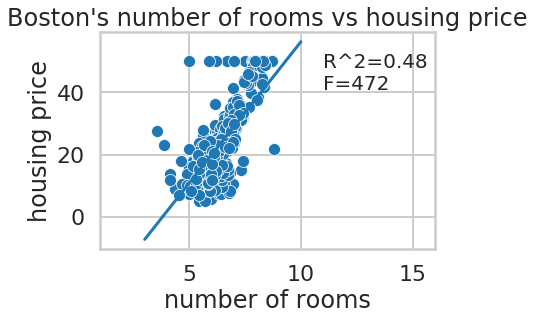

                            OLS Regression Results                            
Dep. Variable:                     RM   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        17:07:41   Log-Likelihood:                -371.73
No. Observations:                 506   AIC:                             747.5
Df Residuals:                     504   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0876      0.060     85.492      0.0

In [44]:
# number of rooms  by town vs price
ln_rm = LinearRegression()
ln_rm.fit(bos[['RM']],bos['PRICE'])
x_line = np.linspace(3,10,21).reshape(-1, 1)
y_line = ln_rm.predict(x_line)
x_line = x_line.ravel()
#plt.figure(figsize=(10,6))
sns.scatterplot(x=bos['RM'],y=bos['PRICE'])
sns.lineplot(x=x_line,y=y_line)
plt.xlabel('number of rooms')
plt.ylabel('housing price')
plt.title('Boston\'s number of rooms vs housing price')
#Rsquared
Rsquare = ln_rm.score(bos[['RM']],bos['PRICE'])

#f-test
row,col=bos.drop(labels='PRICE',axis=1).shape
N=row*col
K=col
Fvalue= Rsquare/(1-Rsquare)*(N-K-1)/K
text='R^2='+str(Rsquare.round(2))+'\nF='+str(int(Fvalue//1)) 
plt.text(x=11,y=41,s=text,fontsize=20)
plt.xlim(1,16)
plt.show()

m = ols('RM ~ PRICE',bos).fit()
print(m.summary())

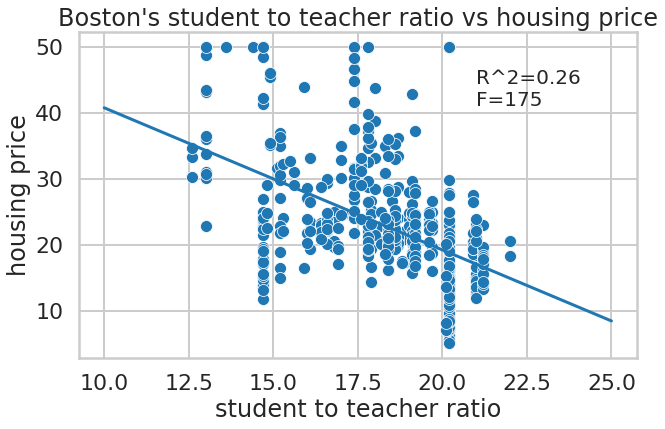

                            OLS Regression Results                            
Dep. Variable:                PTRATIO   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           1.61e-34
Time:                        17:07:45   Log-Likelihood:                -1032.9
No. Observations:                 506   AIC:                             2070.
Df Residuals:                     504   BIC:                             2078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1489      0.220     96.216      0.0

In [45]:
# pupil-teacher ratio by town vs price
ln_ptratio = LinearRegression()
ln_ptratio.fit(bos[['PTRATIO']],bos['PRICE'])
x_line = np.linspace(10,25,20).reshape(-1, 1)
y_line = ln_ptratio.predict(x_line)
x_line = x_line.ravel()
plt.figure(figsize=(10,6))
sns.scatterplot(x=bos['PTRATIO'],y=bos['PRICE'])
sns.lineplot(x=x_line,y=y_line)
plt.xlabel('student to teacher ratio')
plt.ylabel('housing price')
plt.title('Boston\'s student to teacher ratio vs housing price')
#Rsquared
Rsquare = ln_ptratio.score(bos[['PTRATIO']],bos['PRICE'])

#f-test
row,col=bos.drop(labels='PRICE',axis=1).shape
N=row*col
K=col
Fvalue= Rsquare/(1-Rsquare)*(N-K-1)/K
text='R^2='+str(Rsquare.round(2))+'\nF='+str(int(Fvalue//1)) 
plt.text(x=21,y=41,s=text,fontsize=20)
plt.show()

m = ols('PTRATIO ~ PRICE',bos).fit()
print(m.summary())

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.m

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

Including nitric oxides concentration lowers fit F-value which indicate a less well-fit but also AIC lowers, which indicates a better fit. This seems contradictory but both fits have a extremely high F-value indicating good fits. The including of nitric oxides concentration also increases R$^2$ which is another indicator of goodness of fit.

In [46]:

m = ols('PRICE ~ PTRATIO + RM + PTRATIO',data=bos).fit()
print(m.summary())

m2 = ols('PRICE ~ PTRATIO + RM + PTRATIO+ NOX',data=bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     321.7
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           1.04e-90
Time:                        17:07:52   Log-Likelihood:                -1631.8
No. Observations:                 506   AIC:                             3270.
Df Residuals:                     503   BIC:                             3282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5612      4.189     -0.611      0.5

In [47]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

A histogram of the residue reveals that the data is mostly normally distributed with few outliers above a residue above 20. A fitted predicted versus residuals plot revealed these outliers come from 7 points with residue.These outliers cause the residue distribution to be skewed right which violates the normality at the center of the linear regression model.
A quantile-quantile plot is a more visualization tool that makes it easier to identify outliers. It identifies whether a data point is in the quantile along two axis that make the scatter. Those same 7 points appear and are more visually distinct of the other data points than in the scatter plot.

The fitted vs. residual scatterplot allows one to visualize the distribution of the data while a quantile-quantile plot makes it easier to identify data points that are outliers from the distribution.

 5 of these 7 points form a line in the fitted predicted scatter plot. All these 5 points have a housing price of exact 50 thousand. Those points also form a line with few other point that are part of the normal distribution that also have a house price of 50 thousand. The reason for these outlier with the same housing price is unknown but one possibility is a error in data entry.   

There are 3 data points with large leverage according to the leverage point. Removing these data points from the regression weakness the fit. It is not obvious why these are high leverage points. One of them has the highest per capita crime of all the data points and all of them have the student to teacher ratio but other than that nothing in these data points stand out.

Removing the outliers increased the goodness of fit. The R$^2$ increases from 0.615 to 0.749 and the F-value increases from 200.2 to 367.9. Removing the high leverage points lowers the R$^2$ to 0.745 and the F-value to 358.3.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          1.97e-102
Time:                        17:08:03   Log-Likelihood:                -1598.6
No. Observations:                 506   AIC:                             3207.
Df Residuals:                     501   BIC:                             3228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7734      4.364      1.552      0.1

/home/yoni/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


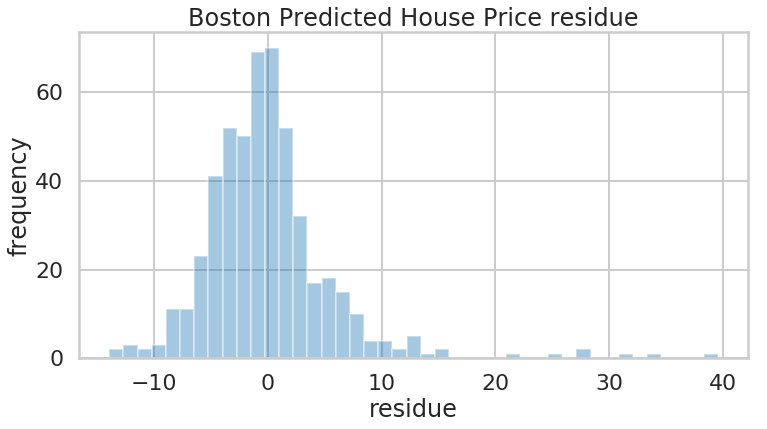

In [48]:
# per capita crime  by town vs price
import statsmodels.formula.api as sm
m = sm.ols(formula=' PRICE ~ PTRATIO + CRIM + RM + NOX',data=bos).fit()
print(m.summary())

y_predict = m.predict(bos[['PTRATIO','CRIM','RM','NOX']])
residue = bos['PRICE'] - y_predict
bos_2=bos.copy(deep=False)[['CRIM','PTRATIO','RM','PRICE','NOX']]
bos_2['Residue']=residue
bos_2['Predict PRICE']=y_predict

#Histagram of the residue
plt.figure(figsize=(12,6))
sns.distplot(residue,kde=False)
plt.xlabel('residue')
plt.ylabel('frequency')
plt.title('Boston Predicted House Price residue')
plt.show()

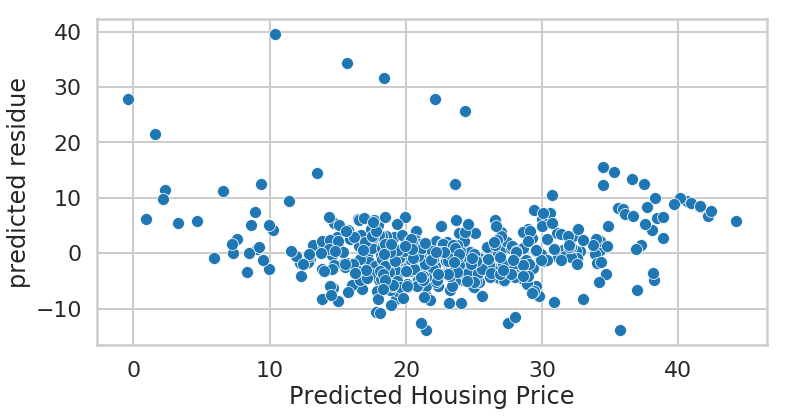

In [49]:
#residue scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_predict,y=residue)
plt.xlabel('Predicted Housing Price')
plt.ylabel('predicted residue')
plt.show()

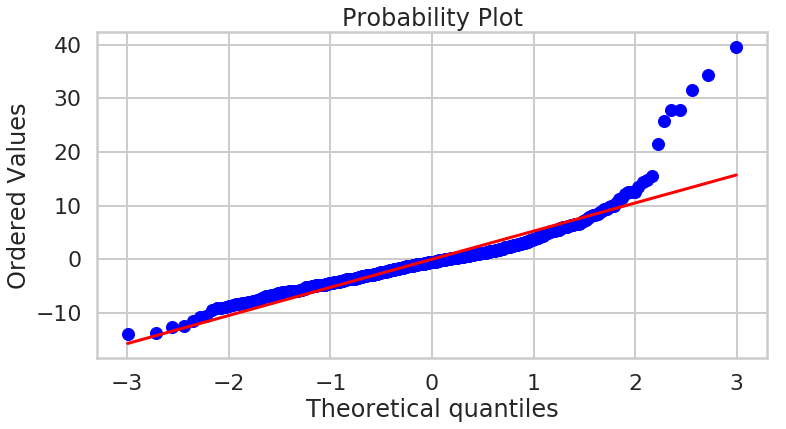

In [50]:
#quantile-quantile plot
import pylab 
plt.figure(figsize=(12,6))
stats.probplot(residue, dist="norm", plot=pylab)
pylab.show()



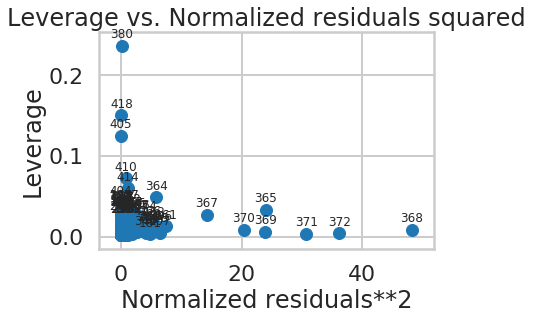

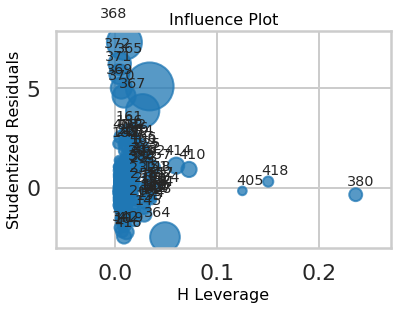

,CRIM,PTRATIO,RM,PRICE,NOX,Residue,Predict PRICE
380,88.9762,20.2,6.968,10.4,0.671,-1.798272,12.198272
405,67.9208,20.2,5.683,5.0,0.693,-0.908743,5.908743
418,73.5341,20.2,5.957,8.8,0.679,1.579801,7.220199


In [53]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2,influence_plot
plot_leverage_resid2(m)
influence_plot(m)
plt.show()
bos_2.iloc[[380,405,418]]

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     367.9
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          1.31e-146
Time:                        17:09:00   Log-Likelihood:                -1450.2
No. Observations:                 499   AIC:                             2910.
Df Residuals:                     494   BIC:                             2931.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4458      3.450      1.578      0.1

/home/yoni/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


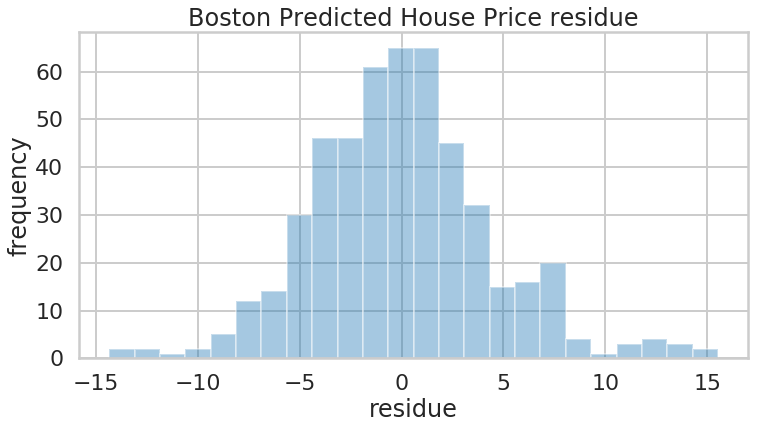

In [56]:
#remove outliers
bos_remove= bos_2.copy(deep=False)
bos_remove = bos_remove[bos_remove['Residue'] < 20]
m_remove = sm.ols(formula=' PRICE ~ PTRATIO + CRIM + RM+ NOX',data=bos_remove).fit()
print(m_remove.summary())

#remove outliers and high leverage points
bos_remove.drop([380,405,418],inplace=True)
bos_remove = bos_remove[bos_remove['Residue'] < 20]
m_remove = sm.ols(formula=' PRICE ~ PTRATIO + CRIM + RM+ NOX',data=bos_remove).fit()
print(m_remove.summary())


##Histagram of the residue
y_predict2 = m_remove.predict(bos_remove[['PTRATIO','CRIM','RM','NOX']])
residue2 = bos_remove['PRICE'] - y_predict2
plt.figure(figsize=(12,6))
sns.distplot(residue2,kde=False)
plt.xlabel('residue')
plt.ylabel('frequency')
plt.title('Boston Predicted House Price residue')
plt.show()

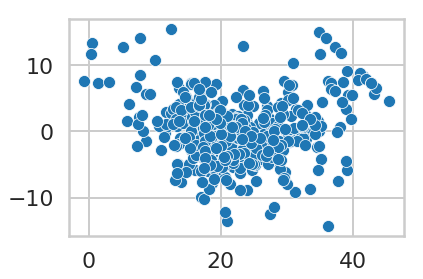

In [55]:
sns.scatterplot(x=y_predict2,y=residue2)